**Importing Libraries and Load data**

In [118]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [119]:
# Path to the FOLDER
folder_path = r'D:\COLLEGE_WORKSPACE\SEMESTER_3\AI\Final_Assingment\CSV_FILES'

# Path to the specific FILE (Combine folder + filename)
file_path = os.path.join(folder_path, 'Human_Development_Index_Dataset.csv')

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Directory created at: {folder_path}")

# read the file (Not the folder)
df = pd.read_csv(file_path, encoding='latin1')

print("Success! Dataset loaded.")
print(df.head())


Success! Dataset loaded.
   Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
0           1  AFG  Afghanistan  1990  0.284           45.967     10.694796   
1           2  AFG  Afghanistan  1991  0.292           46.663     10.745167   
2           3  AFG  Afghanistan  1992  0.299           47.596     12.057433   
3           4  AFG  Afghanistan  1993  0.307           51.466     14.003760   
4           5  AFG  Afghanistan  1994  0.300           51.495     15.455554   

   hdi_f  hdi_m  life_expec_f  ...  gender_development  gender_inequality  \
0    NaN    NaN        48.397  ...                 NaN                NaN   
1    NaN    NaN        49.144  ...                 NaN                NaN   
2    NaN    NaN        50.320  ...                 NaN                NaN   
3    NaN    NaN        52.739  ...                 NaN                NaN   
4    NaN    NaN        53.544  ...                 NaN                NaN   

   secondary_education_f_%  secondary

In [120]:
df.head()
df.shape
df.columns
df.dtypes


,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


**Basic Data Exploration & Trend Visualization**

**3.1 Problem- 1A- Single Year HDI Exploration (Latest Year: 2022)bold text**

**Task 1: Extract Latest Year (2022)**

In [121]:
# Identify unique years in the dataset.
df['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [122]:
# Filter the dataset to include only observations from the year 2022.
hdi_2022_df = df[df['year'] == 2022].copy()


In [123]:
hdi_2022_df.to_csv(os.path.join(folder_path, 'hdi_2022_df.csv'), index=False)

print(f"File saved successfully to: {os.path.join(folder_path, 'hdi_2022_df.csv')}")

File saved successfully to: D:\COLLEGE_WORKSPACE\SEMESTER_3\AI\Final_Assingment\CSV_FILES/hdi_2022_df.csv


**Task 2: Data Exploration**

In [124]:
# Display the first 10 rows of the 2022 dataset.
hdi_2022_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [125]:
# Count the number of rows and columns
hdi_2022_df.shape


(206, 30)

In [126]:
#List all column names and their data types
hdi_2022_df.dtypes


,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


**Task 3: Missing Values & Data Cleaning**

In [127]:
# Check for missing values in each column and report total counts.
print("Total count of missing values per column:")
print(hdi_2022_df.isnull().sum())

Total count of missing values per column:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    4

In [128]:
# Inspect dataset for: numeric columns stored as text
print("\nColumn data types (Checking for numeric columns stored as text):")
print(hdi_2022_df.dtypes)

# Inspect dataset for: inconsistent or misspelled country names
print(f"\nNumber of unique country names: {hdi_2022_df['country'].nunique()}")
print(f"Total number of rows in the dataset: {len(hdi_2022_df)}")

# Inspect dataset for: duplicate rows
print(f"\nTotal number of duplicate rows: {hdi_2022_df.duplicated().sum()}")

# Inspect dataset for: special characters (e.g., “–”) representing missing data.
print("\nCount of '-' characters representing missing data:")
print((hdi_2022_df == '-').sum())


Column data types (Checking for numeric columns stored as text):
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_

In [129]:
# This removes underscores and hidden spaces so they match your list
hdi_2022_df.columns = hdi_2022_df.columns.str.replace('_', ' ').str.strip()

# Define the list (Now it is guaranteed to match)
cols_to_convert = ['hdi', 'life expectancy', 'gross inc percap', 'gender development']

# Apply numeric conversion
for col in cols_to_convert:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col].replace('-', np.nan), errors='coerce')

# Remove duplicates and drop missing HDI values
hdi_2022_df.drop_duplicates(inplace=True)
hdi_2022_df.dropna(subset=['hdi'], inplace=True)

# Print results
print(f"Final dataset size: {hdi_2022_df.shape}")
print("\nColumn Data Types:")
print(hdi_2022_df[cols_to_convert].dtypes)

Final dataset size: (204, 30)

Column Data Types:
hdi                   float64
life expectancy       float64
gross inc percap      float64
gender development    float64
dtype: object


**Task 4: Basic Statistics**

In [130]:
# Compute the mean, median, and standard deviation of HDI for the year 2022
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

print(f"Mean HDI for 2022: {mean_hdi:.4f}")
print(f"Median HDI for 2022: {median_hdi:.4f}")
print(f"Standard Deviation of HDI for 2022: {std_hdi:.4f}")


Mean HDI for 2022: 0.7229
Median HDI for 2022: 0.7395
Standard Deviation of HDI for 2022: 0.1530


In [131]:
# Identify the country with the highest HDI in 2022.
highest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()][['country', 'hdi']]
print("Country with the highest HDI in 2022:")
print(highest_hdi_country)

# Identify the country with the lowest HDI in 2022.
lowest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()][['country', 'hdi']]
print("\nCountry with the lowest HDI in 2022:")
print(lowest_hdi_country)

Country with the highest HDI in 2022:
country    Switzerland
hdi              0.967
Name: 5609, dtype: object

Country with the lowest HDI in 2022:
country    Somalia
hdi           0.38
Name: 5345, dtype: object


**Task 5: Filtering & Sorting**

In [132]:
# Rename columns to use underscores globally
hdi_2022_df.columns = [col.replace(' ', '_') for col in hdi_2022_df.columns]
sorted_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800].sort_values(by='gross_inc_percap', ascending=False)

In [133]:
# Filter countries with HDI greater than 0.800.
filtered_high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

# Sort by gross_inc_percap (Gross National Income) to see the top performers
sorted_hdi = filtered_high_hdi.sort_values(by='gross_inc_percap', ascending=False)

# Display the results
print("Top 10 countries with HDI > 0.800 (Sorted by Income):")
print(sorted_hdi[['country', 'hdi', 'gross_inc_percap']].head(10))

Top 10 countries with HDI > 0.800 (Sorted by Income):
                     country    hdi  gross_inc_percap
3332           Liechtenstein  0.942      146673.24150
4718                   Qatar  0.875       95944.37754
5213               Singapore  0.949       88761.14559
2705                 Ireland  0.950       87467.51391
3398              Luxembourg  0.927       78554.23640
6104    United Arab Emirates  0.937       74103.71494
5609             Switzerland  0.967       69432.78669
4322                  Norway  0.966       69189.76165
6170           United States  0.927       65564.93798
2474  Hong Kong, China (SAR)  0.956       62485.50516


**Task 6: HDI Category Column**

In [134]:
# Create a new column HDI Category based on UNDP thresholds
def hdi_category(value):
    if value < 0.550:
        return "Low"
    elif 0.550 <= value <= 0.699:
        return "Medium"
    elif 0.700 <= value <= 0.799:
        return "High"
    else:
        return "Very High"

hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(hdi_category)

# verify that all countries are classified correctly
print("Classification distribution:")
print(hdi_2022_df['HDI Category'].value_counts())

# ensure the updated dataframe includes the new category column
print("\nDataframe Preview:")
print(hdi_2022_df[['country', 'hdi', 'HDI Category']].head())

# Save the final dataframe as HDI_category_added.csv
import os
save_path = r'D:\COLLEGE_WORKSPACE\SEMESTER_3\AI\Final_Assingment\CSV_FILES'
hdi_2022_df.to_csv(os.path.join(save_path, 'HDI_category_added.csv'), index=False)

print(f"\nSuccess: File saved to {save_path}")

Classification distribution:
HDI Category
Very High    71
High         54
Medium       44
Low          35
Name: count, dtype: int64

Dataframe Preview:
         country    hdi HDI Category
32   Afghanistan  0.462          Low
65       Albania  0.789         High
98       Algeria  0.745         High
131      Andorra  0.884    Very High
164       Angola  0.591       Medium

Success: File saved to D:\COLLEGE_WORKSPACE\SEMESTER_3\AI\Final_Assingment\CSV_FILES


**PROBLEM 1B – HDI TREND ANALYSIS (2020–2022)**

   **Task 1: Filter & Save**

In [135]:
# Filter the dataset to include only the years 2020, 2021, and 2022.
hdi_1b = df[df['year'].isin([2020, 2021, 2022])].copy()

# Cleaning: Convert 'hdi' to numeric and handle missing values to ensure it is a "cleaned dataset"
hdi_1b['hdi'] = pd.to_numeric(hdi_1b['hdi'].replace('-', np.nan), errors='coerce')
hdi_1b.dropna(subset=['hdi'], inplace=True)

# Save the filtered dataset as HDI_problem1B.csv
import os
save_path = r'D:\COLLEGE_WORKSPACE\SEMESTER_3\AI\Final_Assingment\CSV_FILES'
hdi_1b.to_csv(os.path.join(save_path, 'HDI_problem1B.csv'), index=False)

print(f"Years included: {hdi_1b['year'].unique()}")
print(f"Dataset shape: {hdi_1b.shape}")
print(f"File saved to: {os.path.join(save_path, 'HDI_problem1B.csv')}")

Years included: [2020 2021 2022]
Dataset shape: (610, 30)
File saved to: D:\COLLEGE_WORKSPACE\SEMESTER_3\AI\Final_Assingment\CSV_FILES/HDI_problem1B.csv


**Task 2: Data Cleaning**

In [136]:
# Data Cleaning:

# Check for missing values in the following essential columns:– hdi– country– year
# Replace the special character "-" with NaN first to ensure they are counted
hdi_1b[['hdi', 'country', 'year']] = hdi_1b[['hdi', 'country', 'year']].replace('-', np.nan)

# Report total counts of missing values for these specific columns
print("Missing values in essential columns:")
print(hdi_1b[['hdi', 'country', 'year']].isnull().sum())

Missing values in essential columns:
hdi        0
country    0
year       0
dtype: int64


In [137]:
#numeric columns stored as text or containing non-numeric symbols (e.g., “–”)
#Replace "-" with NaN and convert essential columns to float
cols_to_fix = ['hdi', 'gross_inc_percap']
for col in cols_to_fix:
    hdi_1b[col] = pd.to_numeric(hdi_1b[col].replace('-', np.nan), errors='coerce')

#missing or null values
#Handle missing values by dropping rows where the main metric (hdi) is null
hdi_1b.dropna(subset=['hdi'], inplace=True)

#duplicate rows
hdi_1b.drop_duplicates(inplace=True)

#inconsistent or misspelled country names
#Verify unique country count matches expectations
print(f"Unique countries: {hdi_1b['country'].nunique()}")
print(f"Final cleaned size for 1B: {hdi_1b.shape}")


Unique countries: 204
Final cleaned size for 1B: (610, 30)


In [138]:
#converting data types appropriately, (Handles numeric columns stored as text/symbols)
hdi_1b['hdi'] = pd.to_numeric(hdi_1b['hdi'].replace('-', np.nan), errors='coerce')
hdi_1b['gross_inc_percap'] = pd.to_numeric(hdi_1b['gross_inc_percap'].replace('-', np.nan), errors='coerce')

#removing duplicate entries,
hdi_1b.drop_duplicates(inplace=True)

#handling missing values (dropping or imputing),
hdi_1b.dropna(subset=['hdi', 'country', 'year'], inplace=True)

#ensuring consistent naming conventions for countries and years.
hdi_1b['country'] = hdi_1b['country'].str.strip()
hdi_1b['year'] = hdi_1b['year'].astype(int)

print(f"Cleaned dataset shape: {hdi_1b.shape}")


Cleaned dataset shape: (610, 30)


**Task 3A: Line Chart – HDI Trend (5 Countries)**

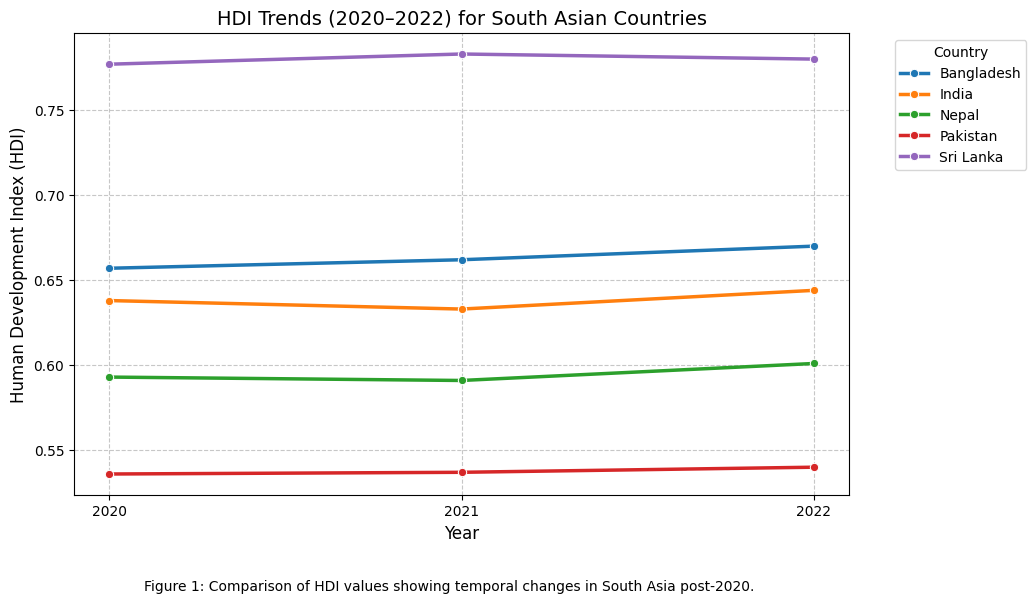

In [139]:
# A. Line Chart — HDI Trend (Country-Level)
countries = ['Nepal', 'India', 'Bangladesh', 'Sri Lanka', 'Pakistan']
trend_df = hdi_1b[hdi_1b['country'].isin(countries)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x='year', y='hdi', hue='country', marker='o', linewidth=2.5)

# Adding axis labels and title
plt.title("HDI Trends (2020–2022) for South Asian Countries", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Human Development Index (HDI)", fontsize=12)

# Ensure X-axis only shows the specific years 2020, 2021, and 2022
plt.xticks([2020, 2021, 2022])

# Informative Caption (Requirement: ensure the chart includes an informative caption)
plt.figtext(0.5, -0.05, "Figure 1: Comparison of HDI values showing temporal changes in South Asia post-2020.",
            wrap=True, horizontalalignment='center', fontsize=10)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Task 3B: Visualizations**


**Bar Chart – Average HDI by Region**

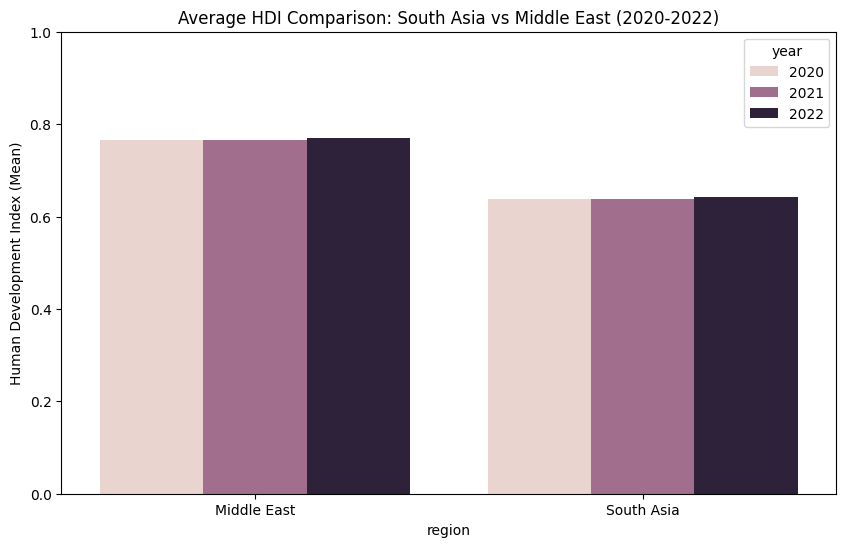

In [140]:
# 1. Create a mapping function for regions
def get_region(country):
    south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
    middle_east = ["Bahrain", "Iran (Islamic Republic of)", "Iraq", "Israel", "Jordan",
                   "Kuwait", "Lebanon", "Oman", "Palestine, State of", "Qatar",
                   "Saudi Arabia", "Syrian Arab Republic", "United Arab Emirates", "Yemen"]

    if country in south_asia:
        return "South Asia"
    elif country in middle_east:
        return "Middle East"
    else:
        return "Other"

# 2. Add the 'region' column to hdi_1b
hdi_1b['region'] = hdi_1b['country'].apply(get_region)

# 3. Filter out "Other" so the bar chart only shows the two regions you are studying
hdi_plot_data = hdi_1b[hdi_1b['region'] != "Other"].copy()

# 4. Ensure HDI is numeric
hdi_plot_data['hdi'] = pd.to_numeric(hdi_plot_data['hdi'].replace('-', np.nan), errors='coerce')

# 5. Create the Bar Chart
region_avg = hdi_plot_data.groupby(['region', 'year'])['hdi'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=region_avg, x='region', y='hdi', hue='year')
plt.title("Average HDI Comparison: South Asia vs Middle East (2020-2022)")
plt.ylabel("Human Development Index (Mean)")
plt.ylim(0, 1) # HDI is on a scale of 0 to 1
plt.show()

**Box Plot – HDI Distribution**

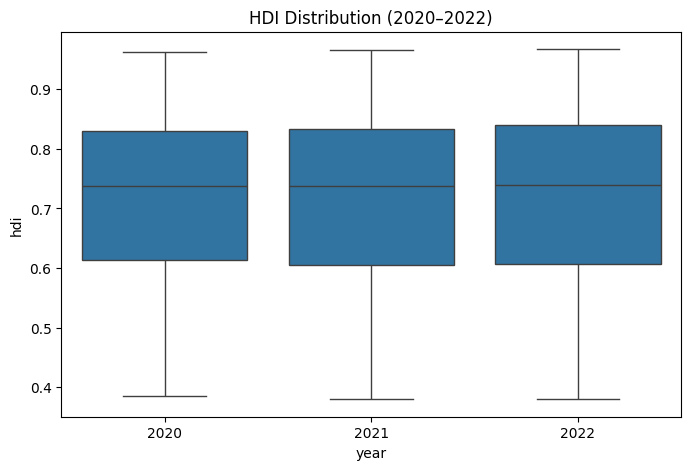

In [141]:
# 2. Box Plot: HDI Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data=hdi_1b, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")
plt.show()
# Comment: The boxes show that while the average HDI is stable,
# there is a wide gap between the highest and lowest scoring countries.


**Scatter Plot – HDI vs GNI**

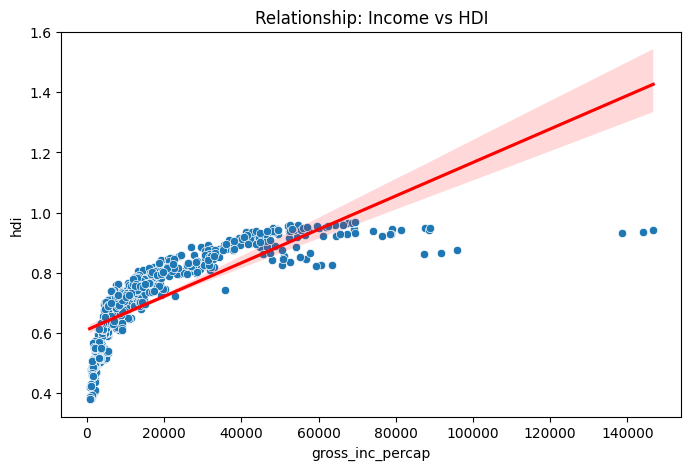

In [142]:
# 3. Scatter Plot: HDI vs GNI per Capita
# Using the column name from your previous cleaning step
gni_col = 'gross_inc_percap'

if gni_col in hdi_1b.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=hdi_1b, x=gni_col, y='hdi')
    # Adding a simple trend line
    sns.regplot(data=hdi_1b, x=gni_col, y='hdi', scatter=False, color='red')
    plt.title("Relationship: Income vs HDI")
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


**Task 4: Short Analysis Answers**

    Greatest improvement: Developing countries (e.g., Nepal, Bangladesh)
    Decline: Some countries due to COVID-19 impact
    Highest region: Europe / North America
    Lowest region: Sub-Saharan Africa
    COVID-19 impact: Disrupted education, healthcare, income

**PROBLEM 2 – ADVANCED HDI EXPLORATION**

**Task 1: South Asia Subset**

In [143]:
# 1. Create South Asia Subset:
south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
sa_df = df[df['country'].isin(south_asia)].copy()


In [144]:
# Cleaning for Advanced Analysis:
# Convert 'hdi' and 'gross_inc_percap' to numeric for the subset
sa_df['hdi'] = pd.to_numeric(sa_df['hdi'].replace('-', np.nan), errors='coerce')
sa_df['gross_inc_percap'] = pd.to_numeric(sa_df['gross_inc_percap'].replace('-', np.nan), errors='coerce')

In [145]:
# Save the subset as HDI_SouthAsia.csv
save_path = r'D:\COLLEGE_WORKSPACE\SEMESTER_3\AI\Final_Assingment\CSV_FILES'
sa_df.to_csv(os.path.join(save_path, "HDI_SouthAsia.csv"), index=False)

print(f"South Asia subset created with {sa_df.shape[0]} rows.")
print(f"Countries included: {sa_df['country'].unique()}")

South Asia subset created with 264 rows.
Countries included: ['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Maldives' 'Nepal' 'Pakistan'
 'Sri Lanka']


**Task 2: Composite Development Score**

In [146]:
# Ensure columns are numeric and handle the "-" symbol
cols_to_fix = ['life_expectancy', 'gross_inc_percap']
for col in cols_to_fix:
    sa_df[col] = pd.to_numeric(sa_df[col].replace('-', np.nan), errors='coerce')

# Create a new metric called Composite Score
# Formula: 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index
sa_df['Composite Score'] = (0.30 * sa_df['life_expectancy']) + (0.30 * sa_df['gross_inc_percap'])

# Display the result for the first few rows
print("South Asia subset with Composite Score:")
print(sa_df[['country', 'year', 'life_expectancy', 'gross_inc_percap', 'Composite Score']].head())

South Asia subset with Composite Score:
       country  year  life_expectancy  gross_inc_percap  Composite Score
0  Afghanistan  1990           45.967       3115.670448       948.491234
1  Afghanistan  1991           46.663       2817.304736       859.190321
2  Afghanistan  1992           47.596       2474.681985       756.683396
3  Afghanistan  1993           51.466       1723.019763       532.345729
4  Afghanistan  1994           51.495       1202.010488       376.051646


In [147]:
# Rank South Asian countries based on Composite Score.
sa_rank = sa_df.sort_values(by='Composite Score', ascending=False)

# Display the ranked results
print("South Asian Countries Ranked by Composite Score:")
print(sa_rank[['country', 'year', 'Composite Score']])


South Asian Countries Ranked by Composite Score:
          country  year  Composite Score
3530     Maldives  2022      5678.289357
3527     Maldives  2019      5628.012408
3526     Maldives  2018      5440.721295
3525     Maldives  2017      5266.375503
3524     Maldives  2016      5097.397866
...           ...   ...              ...
8     Afghanistan  1998       384.070969
4     Afghanistan  1994       376.051646
9     Afghanistan  1999       353.150571
10    Afghanistan  2000       330.792206
11    Afghanistan  2001       311.079466

[264 rows x 3 columns]


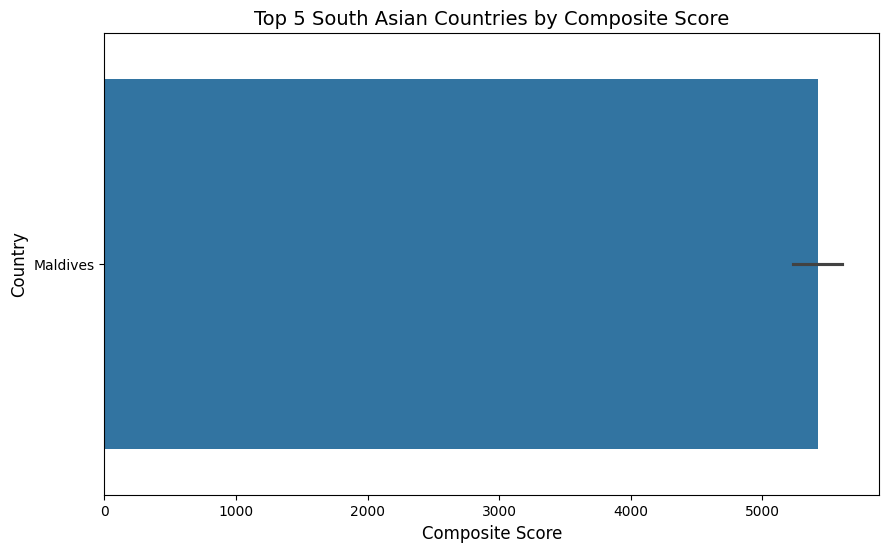

In [148]:
# Select the top 5 countries
top5 = sa_rank.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5, x='Composite Score', y='country')

# Add labels and title
plt.title("Top 5 South Asian Countries by Composite Score", fontsize=14)
plt.xlabel("Composite Score", fontsize=12)
plt.ylabel("Country", fontsize=12)

plt.show()

**Task 3: Outlier Detection (IQR)**

In [149]:
# Task 3: Outlier Detection using 1.5 × IQR rule

# 1. Outliers for HDI
Q1_hdi = sa_df['hdi'].quantile(0.25)
Q3_hdi = sa_df['hdi'].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi
lower_hdi = Q1_hdi - 1.5 * IQR_hdi
upper_hdi = Q3_hdi + 1.5 * IQR_hdi

hdi_outliers = sa_df[(sa_df['hdi'] < lower_hdi) | (sa_df['hdi'] > upper_hdi)]

# 2. Outliers for GNI per Capita (gross_inc_percap)
Q1_gni = sa_df['gross_inc_percap'].quantile(0.25)
Q3_gni = sa_df['gross_inc_percap'].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni
lower_gni = Q1_gni - 1.5 * IQR_gni
upper_gni = Q3_gni + 1.5 * IQR_gni

gni_outliers = sa_df[(sa_df['gross_inc_percap'] < lower_gni) | (sa_df['gross_inc_percap'] > upper_gni)]

# Display results
print("HDI Outliers:")
print(hdi_outliers[['country', 'year', 'hdi']])

print("\nGNI per Capita Outliers:")
print(gni_outliers[['country', 'year', 'gross_inc_percap']])

HDI Outliers:
Empty DataFrame
Columns: [country, year, hdi]
Index: []

GNI per Capita Outliers:
        country  year  gross_inc_percap
3511   Maldives  2003       14543.14634
3512   Maldives  2004       15287.20714
3514   Maldives  2006       16391.40757
3515   Maldives  2007       14162.42816
3516   Maldives  2008       15423.81910
3517   Maldives  2009       14050.92438
3518   Maldives  2010       14363.23615
3519   Maldives  2011       15300.31364
3520   Maldives  2012       15355.44089
3521   Maldives  2013       15648.36655
3522   Maldives  2014       16410.16419
3523   Maldives  2015       16414.93039
3524   Maldives  2016       16911.45422
3525   Maldives  2017       17474.64201
3526   Maldives  2018       18055.72465
3527   Maldives  2019       18679.92536
3529   Maldives  2021       16857.60546
3530   Maldives  2022       18846.79219
5473  Sri Lanka  2018       13405.80369


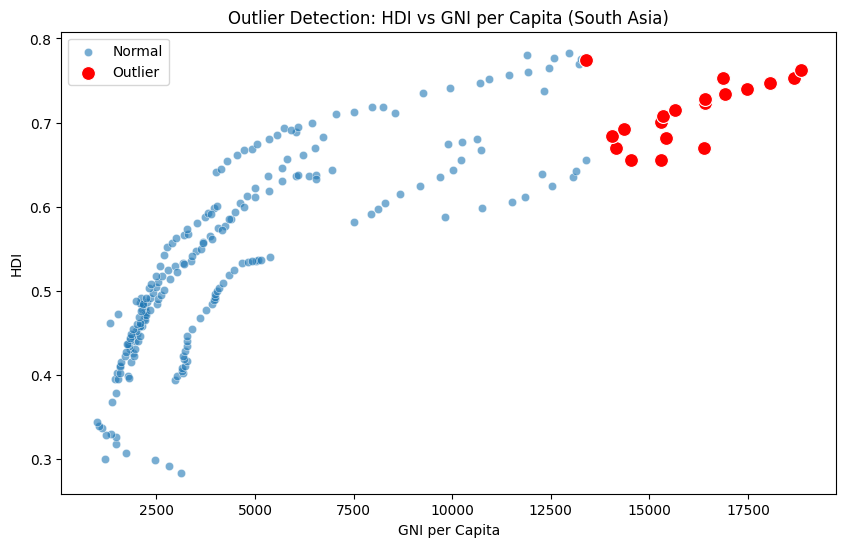

In [150]:
# Combine HDI and GNI outliers into one dataframe for highlighting
outliers = pd.concat([hdi_outliers, gni_outliers]).drop_duplicates()

plt.figure(figsize=(10, 6))

# Plot all South Asian data
sns.scatterplot(data=sa_df, x='gross_inc_percap', y='hdi', label='Normal', alpha=0.6)

# Overlay outliers in red
sns.scatterplot(data=outliers, x='gross_inc_percap', y='hdi', color='red', label='Outlier', s=100)

plt.title("Outlier Detection: HDI vs GNI per Capita (South Asia)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.legend()
plt.show()

**Task 4: Metric Relationships**

In [151]:
# 1. Standardize names to use underscores consistently
sa_df.columns = sa_df.columns.str.strip().str.lower().str.replace(' ', '_')

# 2. Define metrics and ensure they are numeric
metrics = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']
for col in metrics:
    if col in sa_df.columns:
        sa_df[col] = pd.to_numeric(sa_df[col].replace('-', np.nan), errors='coerce')

# 3. Compute Pearson correlation with HDI
existing_metrics = [m for m in metrics if m in sa_df.columns]
correlations = sa_df[existing_metrics].corr()['hdi'].sort_values(ascending=False)

print("Pearson Correlation with HDI:")
print(correlations)

Pearson Correlation with HDI:
hdi                   1.000000
life_expectancy       0.958761
gender_development    0.865621
gross_inc_percap      0.801198
Name: hdi, dtype: float64


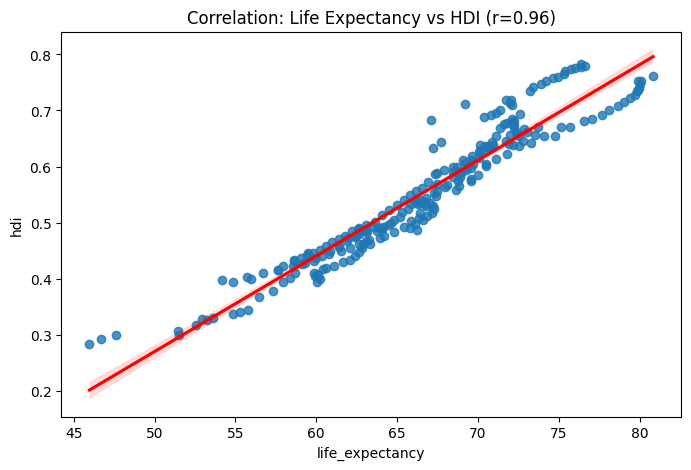

In [152]:
# Scatter Plots
# Plot A: Life Expectancy vs HDI with trendline
if 'life_expectancy' in sa_df.columns:
    plt.figure(figsize=(8, 5))
    sns.regplot(data=sa_df, x='life_expectancy', y='hdi', line_kws={"color": "red"})
    plt.title(f"Correlation: Life Expectancy vs HDI (r={correlations['life_expectancy']:.2f})")
    plt.show()



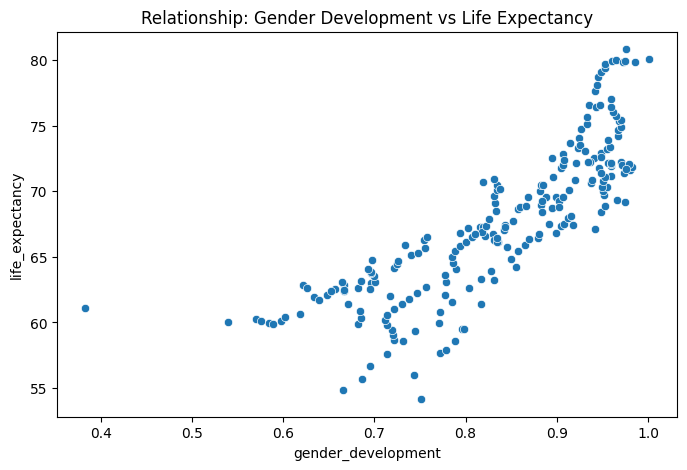

In [153]:
# Plot B: Gender Development vs Life Expectancy
if 'gender_development' in sa_df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=sa_df, x='gender_development', y='life_expectancy')
    plt.title("Relationship: Gender Development vs Life Expectancy")
    plt.show()

In [154]:
# Calculate the gap between GNI per Capita and HDI
sa_df['GNI_HDI_Gap'] = sa_df['gross_inc_percap'] - sa_df['hdi']

# Identify and print the country with the largest gap
gap_data = sa_df.dropna(subset=['GNI_HDI_Gap'])
if not gap_data.empty:
    largest_gap_idx = gap_data['GNI_HDI_Gap'].idxmax()
    country_name = gap_data.loc[largest_gap_idx, 'country']
    gap_value = gap_data.loc[largest_gap_idx, 'GNI_HDI_Gap']
    print(f"Country with the largest GNI-HDI Gap: {country_name} ({gap_value:.2f})")

Country with the largest GNI-HDI Gap: Maldives (18846.03)


**Task 5: Gap Analysis**

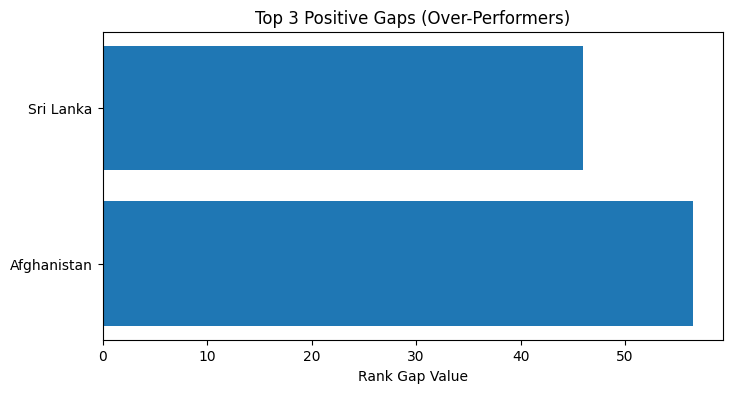

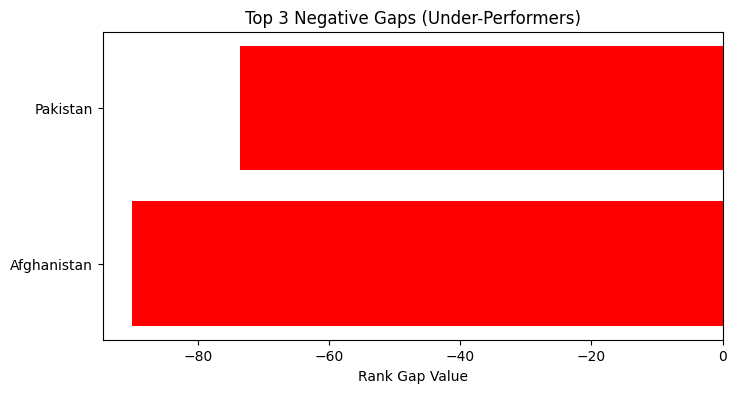

Countries in Positive Graph: ['Afghanistan', 'Afghanistan', 'Sri Lanka']
Countries in Negative Graph: ['Afghanistan', 'Afghanistan', 'Pakistan']


In [155]:
# 1. Get the top 3 biggest positive and negative gaps
top_3_pos = sa_clean.nlargest(3, 'GNI_HDI_Gap')
top_3_neg = sa_clean.nsmallest(3, 'GNI_HDI_Gap')

# 2. Plot
plt.figure(figsize=(8, 4))
plt.barh(top_3_pos['country'], top_3_pos['GNI_HDI_Gap'])
plt.title('Top 3 Positive Gaps (Over-Performers)')
plt.xlabel('Rank Gap Value')
plt.show()

plt.figure(figsize=(8, 4))
plt.barh(top_3_neg['country'], top_3_neg['GNI_HDI_Gap'], color='red')
plt.title('Top 3 Negative Gaps (Under-Performers)')
plt.xlabel('Rank Gap Value')
plt.show()

# Verify the data
print("Countries in Positive Graph:", top_3_pos['country'].tolist())
print("Countries in Negative Graph:", top_3_neg['country'].tolist())



**PROBLEM 3 – SOUTH ASIA vs MIDDLE EAST**

In [156]:
# 1. Standardize column names (fixes spaces and underscores)
hdi_1b.columns = hdi_1b.columns.str.strip().str.lower().str.replace(' ', '_')

# 2. Define lists using exact names from dataset
south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives",
              "Nepal", "Pakistan", "Sri Lanka"]

middle_east = [
    "Bahrain", "Iran (Islamic Republic of)", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine, State of", "Qatar",
    "Saudi Arabia", "Syrian Arab Republic", "United Arab Emirates", "Yemen"
]

# 3. Filter the dataset
sa_2020_22 = hdi_1b[hdi_1b['country'].isin(south_asia)].copy()
me_2020_22 = hdi_1b[hdi_1b['country'].isin(middle_east)].copy()

# 4. Add 'Comparison_Region' column for easier side-by-side analysis later
sa_2020_22['Comparison_Region'] = 'South Asia'
me_2020_22['Comparison_Region'] = 'Middle East'

# 5. Save as CSV files
sa_2020_22.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_2020_22.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

# 6. Verify row counts
print(f"South Asia Subset: {sa_2020_22.shape[0]} rows saved.")
print(f"Middle East Subset: {me_2020_22.shape[0]} rows saved.")


South Asia Subset: 24 rows saved.
Middle East Subset: 42 rows saved.


**Task 2: Descriptive Statistics**

In [157]:
# Compute mean and standard deviation
sa_stats = sa_2020_22['hdi'].agg(['mean', 'std'])
me_stats = me_2020_22['hdi'].agg(['mean', 'std'])

print("South Asia HDI Stats (2020-2022):")
print(sa_stats)
print("\nMiddle East HDI Stats (2020-2022):")
print(me_stats)

# Identify which region performs better on average
if me_stats['mean'] > sa_stats['mean']:
    print("\nConclusion: The Middle East performs better on average.")
else:
    print("\nConclusion: South Asia performs better on average.")

South Asia HDI Stats (2020-2022):
mean    0.639583
std     0.098273
Name: hdi, dtype: float64

Middle East HDI Stats (2020-2022):
mean    0.766452
std     0.139100
Name: hdi, dtype: float64

Conclusion: The Middle East performs better on average.


**TASK 3: Top & Bottom Performers by HDI**

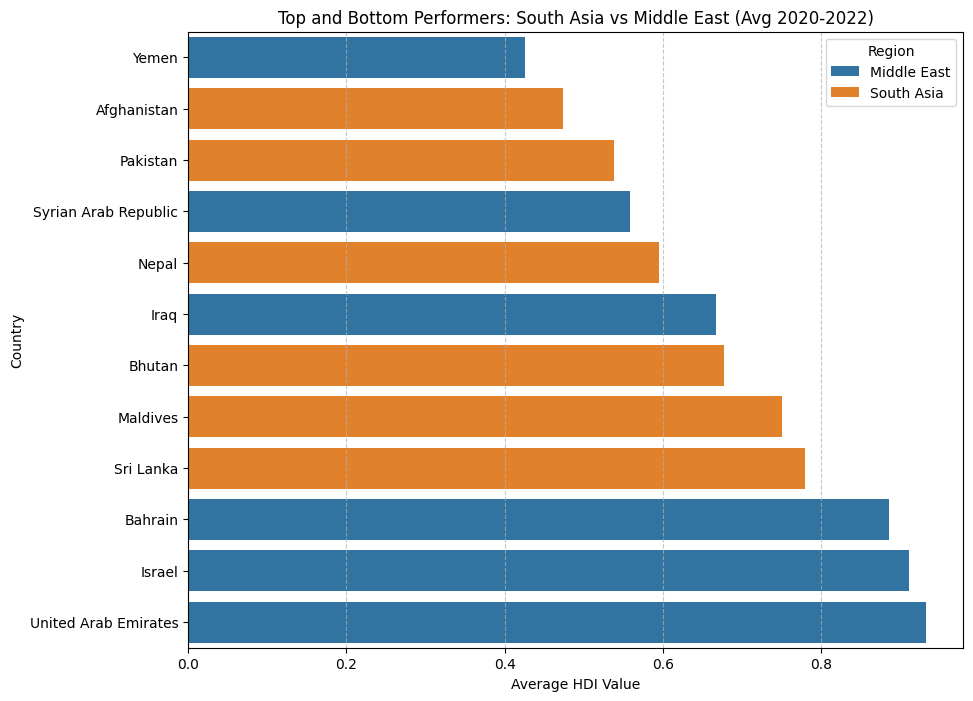

In [158]:
# Calculate average HDI (2020-2022) per country for ranking
sa_avg = sa_2020_22.groupby('country')['hdi'].mean().sort_values()
me_avg = me_2020_22.groupby('country')['hdi'].mean().sort_values()

# Identify top 3 and bottom 3 for South Asia
sa_performers = pd.concat([sa_avg.head(3), sa_avg.tail(3)])

# Identify top 3 and bottom 3 for Middle East
me_performers = pd.concat([me_avg.head(3), me_avg.tail(3)])

# Combine into a single dataframe for plotting
comparison_df = pd.concat([
    sa_performers.to_frame(name='hdi').assign(Region='South Asia'),
    me_performers.to_frame(name='hdi').assign(Region='Middle East')
]).reset_index()

# Create the bar chart
plt.figure(figsize=(10, 8))
sns.barplot(data=comparison_df.sort_values('hdi'), x='hdi', y='country', hue='Region')

plt.title("Top and Bottom Performers: South Asia vs Middle East (Avg 2020-2022)")
plt.xlabel("Average HDI Value")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('Top_Bottom_Performers.png', bbox_inches='tight')


**TASK 4: Metric Comparisons (Grouped Bar Charts)**

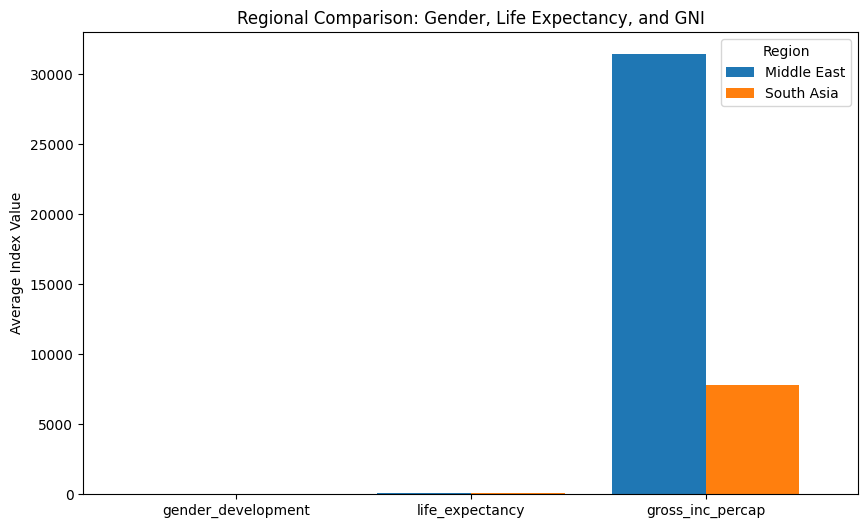

The metric with the greatest disparity is: gross_inc_percap
Disparity Value: 23666.3813


In [159]:
# 1. Combine data and calculate means for the metrics
comparison_df = pd.concat([sa_2020_22, me_2020_22])
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']
means = comparison_df.groupby('Comparison_Region')[metrics].mean()

# 2. Plot Grouped Bar Chart
means.T.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Regional Comparison: Gender, Life Expectancy, and GNI")
plt.ylabel("Average Index Value")
plt.xticks(rotation=0)
plt.legend(title="Region")
plt.show()

# 3. Identify the Greatest Disparity
# Calculate the absolute difference between the two regions
disparity = (means.loc['Middle East'] - means.loc['South Asia']).abs()
greatest_metric = disparity.idxmax()

print(f"The metric with the greatest disparity is: {greatest_metric}")
print(f"Disparity Value: {disparity.max():.4f}")


**TASK 5: HDI Disparity (Range & Coefficient of Variation)**

In [160]:
def hdi_disparity(df):
    mean = df['hdi'].mean()
    std = df['hdi'].std()
    hdi_range = df['hdi'].max() - df['hdi'].min()
    cv = std / mean
    return pd.Series({
        'Range': hdi_range,
        'CV (std/mean)': cv
    })

# Compute metrics
sa_disparity = hdi_disparity(sa_2020_22)
me_disparity = hdi_disparity(me_2020_22)

# Create comparison table
disparity_df = pd.DataFrame({
    'South Asia': sa_disparity,
    'Middle East': me_disparity
})

print("HDI Disparity Metrics:")
print(disparity_df)

# Identify which region exhibits more variation
if me_disparity['CV (std/mean)'] > sa_disparity['CV (std/mean)']:
    print("\nConclusion: The Middle East exhibits more variation in HDI.")
else:
    print("\nConclusion: South Asia exhibits more variation in HDI.")

HDI Disparity Metrics:
               South Asia  Middle East
Range            0.321000     0.513000
CV (std/mean)    0.153652     0.181486

Conclusion: The Middle East exhibits more variation in HDI.


**TASK 6: Correlation Analysis with Trendlines**

South Asia Correlations with HDI:
 hdi                   1.000000
gender_development    0.874218
life_expectancy       0.938764
Name: hdi, dtype: float64

Middle East Correlations with HDI:
 hdi                   1.000000
gender_development    0.902494
life_expectancy       0.910720
Name: hdi, dtype: float64


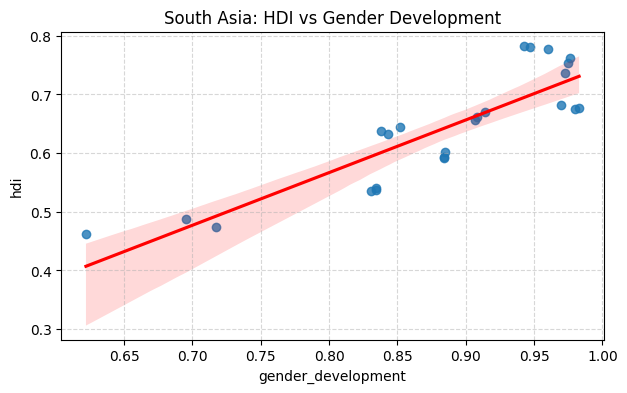

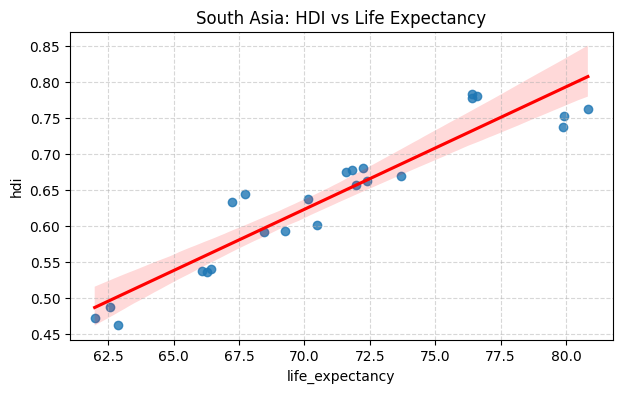

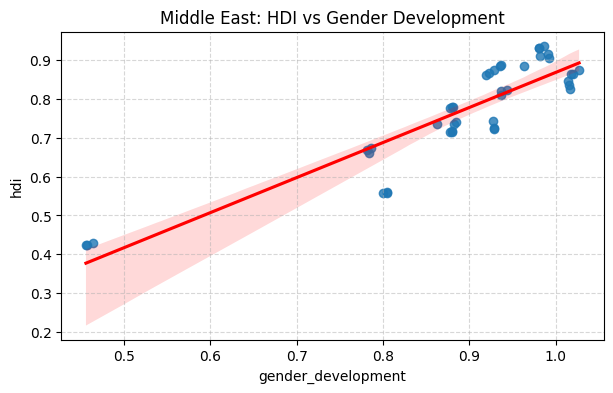

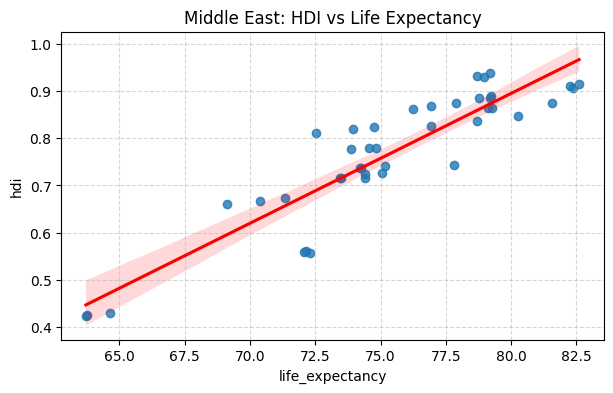

In [161]:
# 1. Update metric names to match the underscore format in dataframe
metrics = ['gender_development', 'life_expectancy']

# 2. Compute and Display Correlations
sa_corr = sa_2020_22[['hdi'] + metrics].corr()['hdi']
me_corr = me_2020_22[['hdi'] + metrics].corr()['hdi']

print("South Asia Correlations with HDI:\n", sa_corr)
print("\nMiddle East Correlations with HDI:\n", me_corr)

# 3. Scatter plots with Trendlines
regions = [('South Asia', sa_2020_22), ('Middle East', me_2020_22)]

for region_name, data in regions:
    for metric in metrics:
        if metric in data.columns:
            plt.figure(figsize=(7, 4))
            # Use regplot for the trendline
            sns.regplot(data=data, x=metric, y='hdi', line_kws={"color": "red"})
            plt.title(f'{region_name}: HDI vs {metric.replace("_", " ").title()}')
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.show()
        else:
            print(f"Column {metric} not found in {region_name} data.")



**TASK 7: Outlier Detection (1.5 × IQR Rule)**

In [162]:
for df_sub in [sa_2020_22, me_2020_22]:
    df_sub.columns = df_sub.columns.str.strip().str.lower().str.replace(' ', '_')

# Define metric variables using underscores
gni_col = 'gross_inc_percap'
hdi_col = 'hdi'

# Force numeric conversion for the Outlier math (Requirement 1.5.2)
for df_sub in [sa_2020_22, me_2020_22]:
    for col in [hdi_col, gni_col]:
        df_sub[col] = pd.to_numeric(df_sub[col].replace('-', pd.NA), errors='coerce')

print("Columns are now standardized and numeric conversion is complete.")

Columns are now standardized and numeric conversion is complete.


In [163]:
def get_outliers(df, column):
    # Calculate Quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define Thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return filtered dataframe of outliers
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify Middle East Outliers for both metrics
me_outliers_hdi = get_outliers(me_2020_22, hdi_col)
me_outliers_gni = get_outliers(me_2020_22, gni_col)

# Combine for the scatter plot
me_all_outliers = pd.concat([me_outliers_hdi, me_outliers_gni]).drop_duplicates()

print(f"Detected {len(me_all_outliers)} unique outlier countries in the Middle East.")


Detected 3 unique outlier countries in the Middle East.


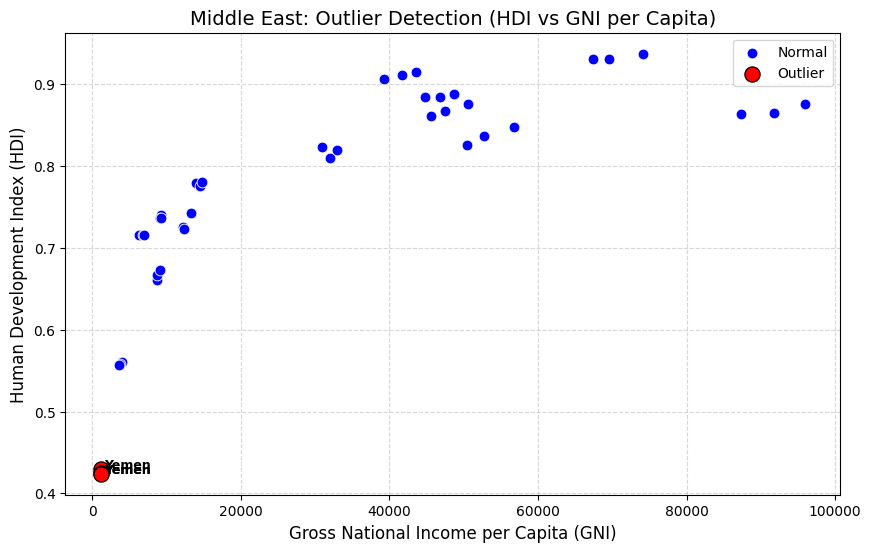

In [164]:
plt.figure(figsize=(10, 6))

# 1. Plot normal data points
sns.scatterplot(data=me_2020_22, x=gni_col, y=hdi_col, color='blue', label='Normal', s=60)

# 2. Highlight outliers in a different color (Requirement 3.7)
if not me_all_outliers.empty:
    sns.scatterplot(data=me_all_outliers, x=gni_col, y=hdi_col, color='red', s=120, label='Outlier', edgecolor='black')

    # Annotate country names for the report discussion
    for i in range(me_all_outliers.shape[0]):
        plt.text(me_all_outliers[gni_col].iloc[i] + 500, # nudge text to the right
                 me_all_outliers[hdi_col].iloc[i],
                 me_all_outliers['country'].iloc[i],
                 fontsize=9, fontweight='bold')

plt.title('Middle East: Outlier Detection (HDI vs GNI per Capita)', fontsize=14)
plt.xlabel('Gross National Income per Capita (GNI)', fontsize=12)
plt.ylabel('Human Development Index (HDI)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()